In [1]:
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import time

from algorythm import build_field, find_polinom_roots_n_threads, Polinome

/Users/lizetta/Baumanka/6_kurs/polyakov/DZ/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
time_values_for_threads = {
    1: [],
    2: [],
    4: [],
    8: []
}
for i in tqdm(range(2, 17)):
    field_1 = build_field(i)
    polinom_1 = Polinome([field_1.get_element_for_degree(0)] + [field_1.get_element_for_degree(-1) for _ in range(2 ** i - 2)] + [field_1.get_element_for_degree(0)], field_1)
    for threads_num in time_values_for_threads:
        start_time = time.time()
        find_polinom_roots_n_threads(polinom_1, threads_num)
        time_values_for_threads[threads_num].append(time.time() - start_time)

 67%|██████▋   | 10/15 [8:44:09<4:22:04, 3145.00s/it]


KeyboardInterrupt: 

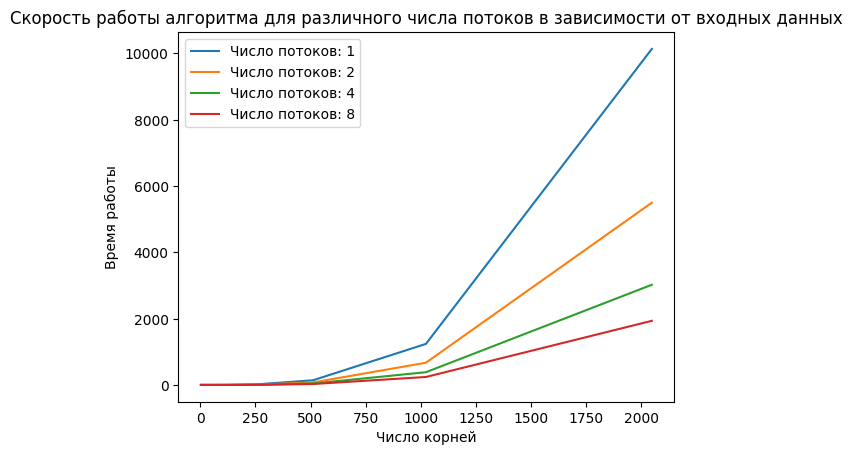

In [5]:
for threads_num in time_values_for_threads:
    plt.plot([2 ** i - 1 for i in range(2, 12)], time_values_for_threads[threads_num], label=f"Число потоков: {threads_num}")
plt.xlabel('Число корней')
plt.ylabel('Время работы')
plt.title('Скорость работы алгоритма для различного числа потоков в зависимости от входных данных')
plt.legend()
plt.show()